<pre><font size=6>Spoken Digit Recognition</font></pre>

<pre>
In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  

<font size=5>instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>

</pre>

In [1]:
import numpy as np
import pandas as pd
import librosa
import os
##if you need any imports you can do that here.
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

We shared recordings.zip, please unzip those. 

In [4]:
#read the all file names in the recordings folder given by us
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"
# getting all the filenames
rec_names = os.listdir('recordings')
data_dir = 'recordings'
all_files = [os.path.join(data_dir, name) for name in rec_names]

<font size=4>Grader function 1 </font>

In [5]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

In [8]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0
data_dict = {'path':all_files, 'label':[name.split('_')[0] for name in os.listdir('recordings')]}
# making the dataframe
df_audio = pd.DataFrame(data_dict)

In [9]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


<font size=4>Grader function 2 </font>

In [10]:
def grader_df():
    flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_shape and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [11]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

In [2]:
# saving the dataframe to the disk
if not os.path.isfile('df_audio.csv'):
    print('File doesnt exist in path, saving...')
    df_audio.to_csv('df_audio.csv', index=False)
else:
    print('File already exists, loading...')
    df_audio = pd.read_csv('df_audio.csv')
    print(df_audio.shape)
    df_audio.head()

File already exists, loading...
(2000, 2)


<pre><font size=4>Train and Validation split</font></pre>

In [3]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
X_train, X_test, y_train, y_test = train_test_split(df_audio['path'], df_audio['label'], test_size=0.3, random_state=45,
                                                   stratify=df_audio['label'])
print(X_train.shape, X_test.shape)

(1400,) (600,)


<font size=4>Grader function 3 </font>

In [21]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [13]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [23]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train
train_audio = {'raw_data':[], 'duration':[]}
print('Making X_train_processed')
for path in tqdm(X_train):
    sample, duration = load_wav(path)
    train_audio['raw_data'].append(sample)
    train_audio['duration'].append(duration)
X_train_processed = pd.DataFrame(train_audio)
    
test_audio = {'raw_data':[], 'duration':[]}
print('Making X_test_processed')
for path in tqdm(X_test):
    sample, duration = load_wav(path)
    test_audio['raw_data'].append(sample)
    test_audio['duration'].append(duration)
X_test_processed = pd.DataFrame(test_audio)

  0%|                                                                                         | 0/1400 [00:00<?, ?it/s]

Making X_train_processed


  2%|█▋                                                                              | 13/600 [00:00<00:04, 122.61it/s]

Making X_test_processed


100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:04<00:00, 129.08it/s]


In [4]:
# saving the dataframes in a pickle file
import pickle
if not(os.path.isfile('X_train_processed.pkl') and (os.path.isfile('X_test_processed.pkl'))):
    print('Files not present in the given directory, saving them...')
    pickle.dump(X_train_processed, open('X_train_processed.pkl', 'wb'))
    pickle.dump(X_test_processed, open('X_test_processed.pkl', 'wb'))
else:
    print("Files present in the directory, loading...")
    X_train_processed = pickle.load(open('X_train_processed.pkl', 'rb'))
    X_test_processed = pickle.load(open('X_test_processed.pkl', 'rb'))
    print(X_train_processed.shape, X_test_processed.shape)

Files present in the directory, loading...
(1400, 2) (600, 2)


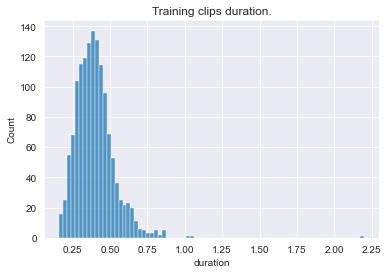

In [3]:
# histogram of duration for train
sns.set_style('darkgrid')
sns.histplot(X_train_processed['duration'])
plt.title('Training clips duration.')
plt.show()

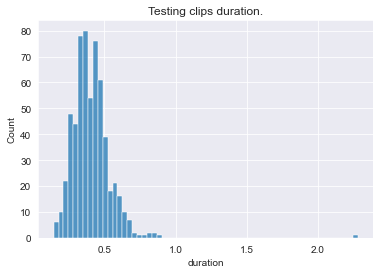

In [31]:
# histogram for duration for test
sns.set_style('darkgrid')
sns.histplot(X_test_processed['duration'])
plt.title('Testing clips duration.')
plt.show()

In [33]:
# 0-100th percentile of train duration with a step size of 10
for i in np.arange(0,101,10):
    print(i,'th percentile is:', np.percentile(X_train_processed['duration'], i))

0 th percentile is: 0.16104308390022676
10 th percentile is: 0.25848072562358276
20 th percentile is: 0.2974331065759637
30 th percentile is: 0.3297777777777778
40 th percentile is: 0.3569160997732426
50 th percentile is: 0.38945578231292516
60 th percentile is: 0.41328798185941046
70 th percentile is: 0.4444671201814059
80 th percentile is: 0.4826848072562358
90 th percentile is: 0.5531655328798186
100 th percentile is: 2.195918367346939


In [34]:
# 90-100th percentile of train duration with a step size of 1
for i in np.arange(90,101,1):
    print(i,'th percentile is:', np.percentile(X_train_processed['duration'], i))

90 th percentile is: 0.5531655328798186
91 th percentile is: 0.5669832199546486
92 th percentile is: 0.5790349206349206
93 th percentile is: 0.599510657596372
94 th percentile is: 0.611208163265306
95 th percentile is: 0.6316009070294784
96 th percentile is: 0.6431455782312925
97 th percentile is: 0.6635741496598639
98 th percentile is: 0.6957514739229022
99 th percentile is: 0.79601179138322
100 th percentile is: 2.195918367346939


<font size=4>Grader function 4 </font>

In [35]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<pre>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset. 

While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640

Pad with Zero if length of sequence is less than 17640 else Truncate the number. 

Also create a masking vector for train and test. 

masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.
</pre>

In [5]:
max_length  = 17640

In [6]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask
# taking the first 'max_length' elements of the array
X_train_pad_seq = [data[:max_length] for data in X_train_processed['raw_data']]
X_test_pad_seq = [data[:max_length] for data in X_test_processed['raw_data']]

# padding the sequences
X_train_pad_seq = np.array([np.concatenate([data, np.zeros(max_length-len(data))]) for data in X_train_pad_seq])
X_test_pad_seq = np.array([np.concatenate([data, np.zeros(max_length-len(data))]) for data in X_test_pad_seq])

# making the masked arrray
X_train_mask = np.zeros(X_train_pad_seq.shape, dtype=bool)
X_test_mask = np.zeros(X_test_pad_seq.shape, dtype=bool)

for i,data in enumerate(X_train_pad_seq):
    mask = [1 if raw!=0 else 0 for raw in data]
    X_train_mask[i] = mask
    
for i,data in enumerate(X_test_pad_seq):
    mask = [1 if raw!=0 else 0 for raw in data]
    X_test_mask[i] = mask

## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.

<font size=4>Grader function 5 </font>

In [7]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
#     print(flag_padshape)
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
#     print(flag_maskshape)
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
#     print(flag_dtype)
    return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

### 1. Giving Raw data directly. 

<pre>
Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). 
3. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
4. make sure that it won't overfit. 
5. You are free to include any regularization
</pre>

In [18]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
import tensorflow as tf

In [9]:
# first chaning the shape of the padded arrays
X_train_pad_seq = X_train_pad_seq.reshape(1400, max_length, 1)
X_test_pad_seq = X_test_pad_seq.reshape(600, max_length, 1)

In [21]:
tf.keras.backend.clear_session()
## as discussed above, please write the LSTM
input_seq = Input((max_length,1)) # the input data
mask_input = Input((max_length), dtype=bool) # masks 

# LSTM
lstm = LSTM(units=32)(inputs=input_seq, mask=mask_input)
# dense layers
dense1 = Dense(64, activation='relu')(lstm)
dropout = Dropout(0.2)(dense1)
output = Dense(10, activation='softmax')(dropout)

model = Model(inputs=[input_seq, mask_input], outputs=[output])

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 17640)]      0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 32)           4352        input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           2112        lstm[0][0]                       
______________________________________________________________________________________________

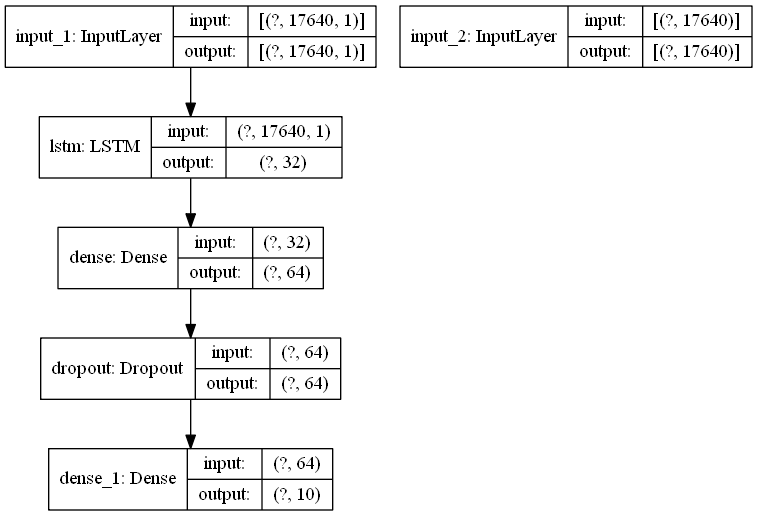

In [23]:
plot_model(model, show_shapes=True)

In [25]:
# making a custom f1 score
from sklearn.metrics import f1_score

def f1_score_metric(y_true, y_pred):
    y_pred = np.argmax(y_pred, axis=1) # to get the actual class labels
    f1 = f1_score(y_true, y_pred, average='micro')
    return f1

def f1(y_true, y_pred):
    return tf.py_function(f1_score_metric, (y_true, y_pred), tf.double)

In [25]:
# tensorboard callback
from tensorflow.keras.callbacks import TensorBoard

logs = 'Logs\\Model-1'
tensorboard = TensorBoard(log_dir=logs, histogram_freq=1, write_graph=True, write_grads=True)

In [26]:
# testing
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', f1])
model.fit([X_train_pad_seq, X_train_mask], y_train, epochs=5, batch_size=16,
          validation_data=([X_test_pad_seq, X_test_mask], y_test), callbacks=[tensorboard])

Train on 1400 samples, validate on 600 samples
Epoch 1/5
1400/1400 [==============================] - 36s 26ms/sample - loss: 2.3033 - accuracy: 0.0793 - f1: 0.0788 - val_loss: 2.3026 - val_accuracy: 0.1000 - val_f1: 0.1020
Epoch 2/5
1400/1400 [==============================] - 32s 23ms/sample - loss: 2.3037 - accuracy: 0.0879 - f1: 0.0874 - val_loss: 2.3026 - val_accuracy: 0.1000 - val_f1: 0.1003
Epoch 3/5
1400/1400 [==============================] - 32s 23ms/sample - loss: 2.3032 - accuracy: 0.0871 - f1: 0.0866 - val_loss: 2.3026 - val_accuracy: 0.1017 - val_f1: 0.1003
Epoch 4/5
1400/1400 [==============================] - 32s 23ms/sample - loss: 2.3030 - accuracy: 0.0843 - f1: 0.0852 - val_loss: 2.3026 - val_accuracy: 0.0933 - val_f1: 0.0938
Epoch 5/5
1400/1400 [==============================] - 32s 23ms/sample - loss: 2.3030 - accuracy: 0.0800 - f1: 0.0795 - val_loss: 2.3026 - val_accuracy: 0.1000 - val_f1: 0.1003


__Tensorboard Plots__

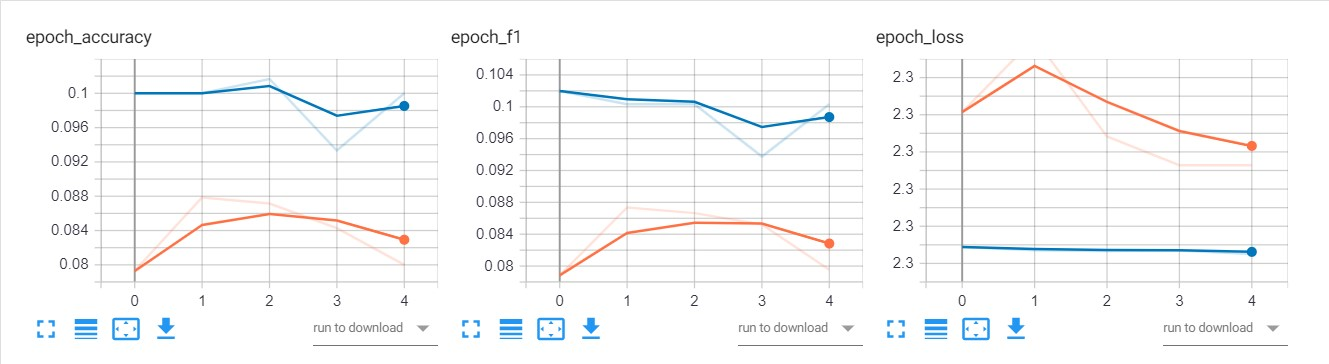

In [102]:
Image('Model1.jpg')

### 2. Converting into spectrogram and giving spectrogram data as input  
<pre>
We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram
</pre>

In [11]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [42]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)
X_train_spectrogram = np.array([convert_to_spectrogram(audio.reshape(len(audio))) for audio in X_train_pad_seq])
X_test_spectrogram = np.array([convert_to_spectrogram(audio.reshape(len(audio))) for audio in X_test_pad_seq])

<font size=4>Grader function 6 </font>

In [43]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True

<pre>
Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (#., time_steps, features) average the output of every time step i.e, you should get (#.,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
5. make sure that it won't overfit. 
6. You are free to include any regularization
</pre>

In [85]:
from tensorflow.keras.backend import clear_session
clear_session()

# model- 2
inp = Input(shape=(64,35))
lstm = LSTM(units=64, return_sequences=True)(inp)
avg_pool = GlobalAveragePooling1D()(lstm)
dense1 = Dense(64, 'relu')(avg_pool)
dropout = Dropout(0.2)(dense1)
dense2 = Dense(32, 'relu')(dropout)
output = Dense(10, 'softmax')(dense2)

model2 = Model(inputs=[inp], outputs=[output])

In [86]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 35)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64, 64)            25600     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330   

In [87]:
# tensorboard 
from tensorflow.keras.callbacks import TensorBoard

logs = 'logs\\Model-2'
tensorboard = TensorBoard(log_dir=logs, histogram_freq=1, write_graph=True, write_grads=True)

In [88]:
# compiling the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', f1])

In [89]:
# fitting the model
model2.fit(X_train_spectrogram, y_train, epochs=90, batch_size=64,
          validation_data=(X_test_spectrogram, y_test), callbacks=[tensorboard])

Train on 1400 samples, validate on 600 samples
Epoch 1/90
1400/1400 [==============================] - 2s 1ms/sample - loss: 2.3011 - accuracy: 0.1207 - f1: 0.1203 - val_loss: 2.2560 - val_accuracy: 0.1833 - val_f1: 0.1875
Epoch 2/90
1400/1400 [==============================] - 0s 187us/sample - loss: 2.2448 - accuracy: 0.1621 - f1: 0.1622 - val_loss: 2.2125 - val_accuracy: 0.1383 - val_f1: 0.1401
Epoch 3/90
1400/1400 [==============================] - 0s 189us/sample - loss: 2.1939 - accuracy: 0.1836 - f1: 0.1835 - val_loss: 2.1516 - val_accuracy: 0.2133 - val_f1: 0.2130
Epoch 4/90
1400/1400 [==============================] - 0s 184us/sample - loss: 2.1205 - accuracy: 0.2007 - f1: 0.2009 - val_loss: 2.0392 - val_accuracy: 0.2800 - val_f1: 0.2755
Epoch 5/90
1400/1400 [==============================] - 0s 193us/sample - loss: 2.0040 - accuracy: 0.2843 - f1: 0.2842 - val_loss: 1.9121 - val_accuracy: 0.3033 - val_f1: 0.3000
Epoch 6/90
1400/1400 [==============================] - 0s 188us/

__Tensorboard plots:__

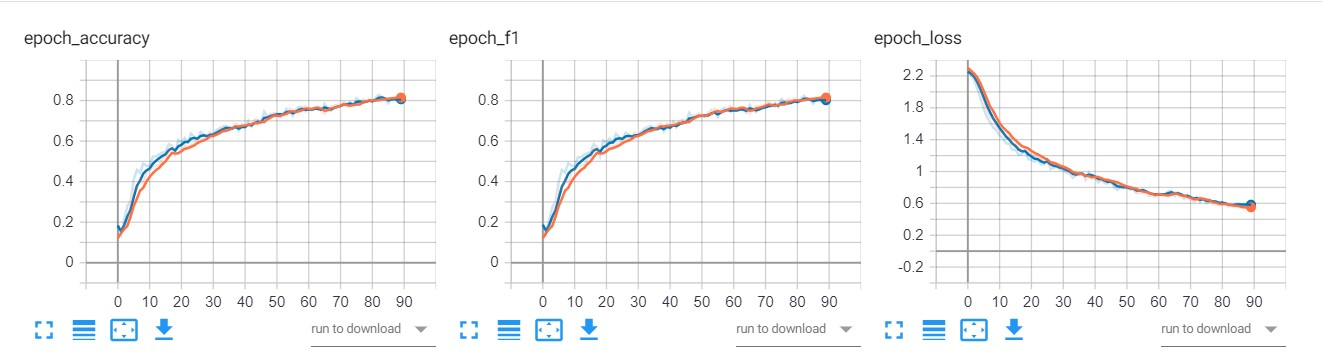

In [11]:
from IPython.display import Image
Image('Model2.jpg')

Legend:
>_Orange_: Train<br>
>_Blue_: Validation

### 3. data augmentation  
<pre>
Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.
</pre>

In [12]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [13]:
temp_path = df_audio.iloc[0].path
aug_temp = generate_augmented_data(temp_path)

In [22]:
len(aug_temp[4])

7514

In [18]:
temp_path, aug_temp

('recordings\\3_yweweler_23.wav',
 [array([ 0.00026591,  0.00032689,  0.00030938, ..., -0.00012916,
         -0.00020093, -0.00035225], dtype=float32),
  array([1.8624858e-04, 2.3876278e-04, 2.4097308e-04, ..., 9.2377551e-05,
         8.7394197e-05, 8.4144536e-05], dtype=float32),
  array([1.9565737e-04, 2.6731161e-04, 2.5372993e-04, ..., 7.1350951e-05,
         6.7737863e-05, 0.0000000e+00], dtype=float32),
  array([ 2.4052177e-04,  2.7931796e-04,  2.5690687e-04, ...,
         -4.2533185e-05, -5.8881451e-05,  0.0000000e+00], dtype=float32),
  array([ 1.75043271e-04,  2.06975819e-04,  2.08523503e-04, ...,
         -2.09796213e-04, -1.47114188e-04, -1.03855164e-07], dtype=float32),
  array([ 0.00016918,  0.00021939,  0.000208  , ..., -0.00021702,
         -0.00028209, -0.00035977], dtype=float32),
  array([ 5.7707436e-04,  6.0790172e-04,  5.2455073e-04, ...,
          9.0312315e-05,  4.5984372e-05, -5.3192809e-05], dtype=float32),
  array([ 5.3540495e-04,  5.2669726e-04,  4.9202767e-04,

As discussed above, for one data point, we will get 9 augmented data points.  

Split data into train and test (80-20 split)

We have 2000 data points(1600 train points, 400 test points) 

Do augmentation only on train data, after augmentation we will get 14400 train points. 

do the above steps i.e training with raw data and spectrogram data with augmentation.

In [3]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(df_audio['path'], df_audio['label'], test_size=0.2,
                                                    stratify=df_audio['label'], random_state=35)
print(X_train.shape, X_test.shape)

(1600,) (400,)


In [67]:
# performing data augmentation on the training data
augmented_data = []
for path in tqdm(X_train):
    augmented = generate_augmented_data(path)
    augmented_data.extend(augmented)

print(len(augmented_data), y_train_aug.shape)

100%|██████████████████████████████████████████████████████████████████████████████| 1600/1600 [04:03<00:00,  6.58it/s]

14400 (14400,)


In [4]:
# since we are getting 9 datapoints for each datapoint in x_train, we need to repeate the class labels in the same order as
# well
y_train_aug = y_train.repeat(9)

In [69]:
# loading the testing audio files
test_audio = {'raw_data':[], 'duration':[]}
for path in tqdm(X_test):
    sample, duration = load_wav(path)
    test_audio['raw_data'].append(sample)
    test_audio['duration'].append(duration)
X_test_processed = pd.DataFrame(test_audio)

100%|███████████████████████████████████████████████████████████████████████████████| 400/400 [00:03<00:00, 129.24it/s]


In [72]:
X_test_processed.shape

(400, 2)

In [73]:
# padding the augmented data to the maximum length and perparing the mask arrays
max_length  = 17640

# selecting the first 'max_length' elements of each array if len(arr)>=max_length
X_train_aug = [arr[:max_length] for arr in augmented_data]
X_test_processed = [arr[:max_length] for arr in X_test_processed['raw_data']]

# padding each sequence to max_length
X_train_pad_seq = np.array([np.concatenate([data, np.zeros(max_length-len(data))]) for data in X_train_aug])
X_test_pad_seq = np.array([np.concatenate([data, np.zeros(max_length-len(data))]) for data in X_test_processed])

# making the masked arrray
X_train_mask = np.zeros(X_train_pad_seq.shape, dtype=bool)
X_test_mask = np.zeros(X_test_pad_seq.shape, dtype=bool)

for i,data in enumerate(X_train_pad_seq):
    mask = [1 if raw!=0 else 0 for raw in data]
    X_train_mask[i] = mask
    
for i,data in enumerate(X_test_pad_seq):
    mask = [1 if raw!=0 else 0 for raw in data]
    X_test_mask[i] = mask

In [6]:
# saving the matrices into the disk
import os
import pickle
if not(os.path.isfile('X_train_aug_data.pkl') and os.path.isfile('X_test_aug_data.pkl')): # these contain both the training data and the mask arrays
    print('Files do not exist, saving...')
    pickle.dump((X_train_pad_seq, X_train_mask), open('X_train_aug_data.pkl', 'wb'))
    pickle.dump((X_test_pad_seq, X_test_mask), open('X_test_aug_data.pkl', 'wb'))
else:
    print('File already exists on the disk, loading...')
    X_train_pad_seq, X_train_mask = pickle.load(open('X_train_aug_data.pkl', 'rb'))
    X_test_pad_seq, X_test_mask = pickle.load(open('X_test_aug_data.pkl', 'rb'))
    print(X_train_pad_seq.shape, X_train_mask.shape)
    print(X_test_pad_seq.shape, X_test_mask.shape)

File already exists on the disk, loading...
(14400, 17640) (14400, 17640)
(400, 17640) (400, 17640)


## Training the models
### Model - 3

In [91]:
# first chaning the shape of the padded arrays
X_train_pad_seq = X_train_pad_seq.reshape(14400, max_length, 1)
X_test_pad_seq = X_test_pad_seq.reshape(400, max_length, 1)

In [94]:
tf.keras.backend.clear_session()
## as discussed above, please write the LSTM
input_seq = Input((max_length,1)) # the input data
mask_input = Input((max_length), dtype=bool) # masks 

# LSTM
lstm = LSTM(units=32)(inputs=input_seq, mask=mask_input)
# dense layers
dense1 = Dense(64, activation='relu')(lstm)
dropout = Dropout(0.2)(dense1)
output = Dense(10, activation='softmax')(dropout)

model3 = Model(inputs=[input_seq, mask_input], outputs=[output])

In [95]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 17640)]      0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 32)           4352        input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           2112        lstm[0][0]                       
______________________________________________________________________________________________

In [96]:
# compiling the model
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1])

In [99]:
# tensorboard callbacks
from tensorflow.keras.callbacks import TensorBoard

logs = 'Logs\\Model-3'
tensorboard = TensorBoard(log_dir=logs, histogram_freq=1, write_graph=True, write_grads=True)

In [100]:
# fitting the model
model3.fit([X_train_pad_seq, X_train_mask], y_train_aug, epochs=5, batch_size=16,
          validation_data=([X_test_pad_seq, X_test_mask], y_test), callbacks=[tensorboard])

Train on 14400 samples, validate on 400 samples
Epoch 1/5
14400/14400 [==============================] - 312s 22ms/sample - loss: 2.3032 - accuracy: 0.0928 - f1: 0.0928 - val_loss: 2.3026 - val_accuracy: 0.1000 - val_f1: 0.1000
Epoch 2/5
14400/14400 [==============================] - 307s 21ms/sample - loss: 2.3032 - accuracy: 0.0978 - f1: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.0925 - val_f1: 0.0925
Epoch 3/5
14400/14400 [==============================] - 307s 21ms/sample - loss: 2.3030 - accuracy: 0.0988 - f1: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000 - val_f1: 0.1000
Epoch 4/5
14400/14400 [==============================] - 307s 21ms/sample - loss: 2.3030 - accuracy: 0.0952 - f1: 0.0952 - val_loss: 2.3026 - val_accuracy: 0.1000 - val_f1: 0.1000
Epoch 5/5
14400/14400 [==============================] - 309s 21ms/sample - loss: 2.3030 - accuracy: 0.0959 - f1: 0.0959 - val_loss: 2.3027 - val_accuracy: 0.1000 - val_f1: 0.1000


__Tensorboard plots__

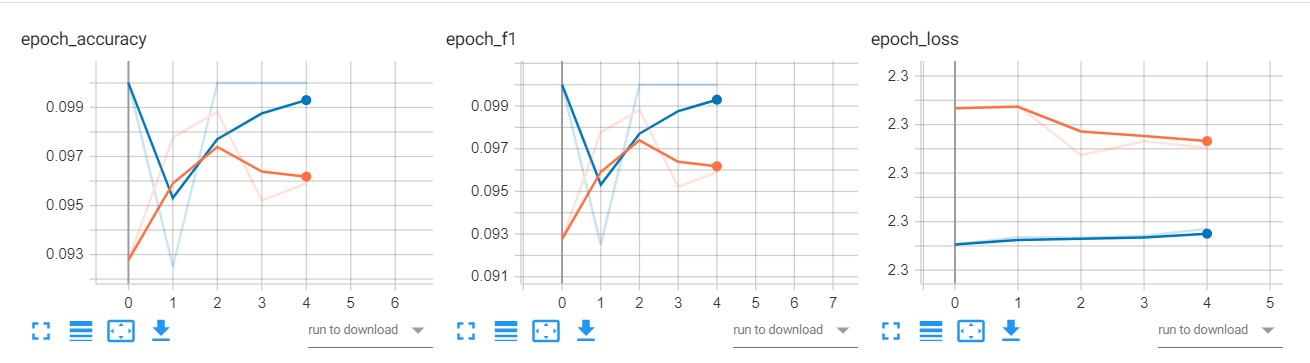

In [101]:
Image('Model3.jpg')

__Legend:__
> _Blue_: Validation<br>
> _Orange_: Train

### Model- 4

In [14]:
# making the spectrogram
X_train_spectrogram = np.array([convert_to_spectrogram(audio) for audio in X_train_pad_seq])
X_test_spectrogram = np.array([convert_to_spectrogram(audio) for audio in X_test_pad_seq])
print(X_train_spectrogram.shape, X_test_spectrogram.shape)

(14400, 64, 35) (400, 64, 35)


In [19]:
from tensorflow.keras.backend import clear_session
clear_session()

# model- 2
inp = Input(shape=(64,35))
lstm = LSTM(units=64, return_sequences=True)(inp)
avg_pool = GlobalAveragePooling1D()(lstm)
dense1 = Dense(64, 'relu')(avg_pool)
dropout = Dropout(0.2)(dense1)
dense2 = Dense(32, 'relu')(dropout)
output = Dense(10, 'softmax')(dense2)

model4 = Model(inputs=[inp], outputs=[output])

In [20]:
model4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 35)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64, 64)            25600     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330   

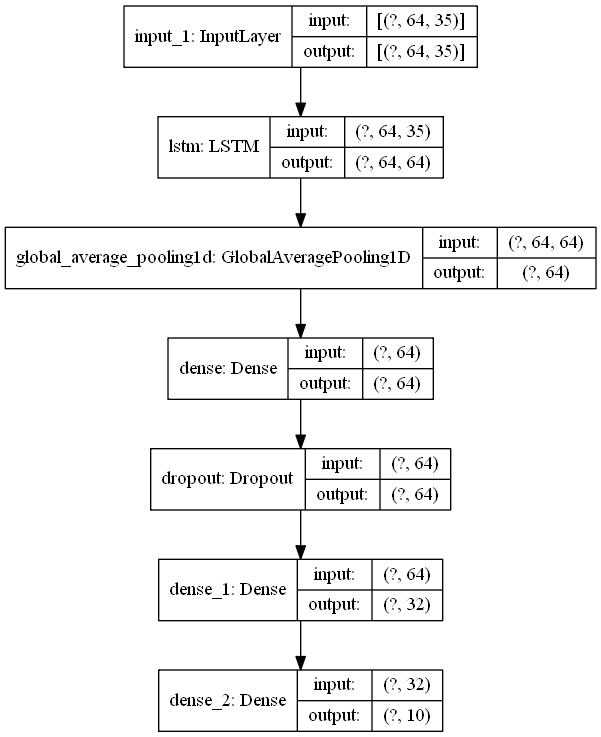

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model4, show_shapes=True)

In [23]:
# tensorboard 
from tensorflow.keras.callbacks import TensorBoard

logs = 'logs\\Model-4'
tensorboard = TensorBoard(log_dir=logs, histogram_freq=1, write_graph=True, write_grads=True)

In [26]:
# compiling the model
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', f1])

In [28]:
# fitting the model
model4.fit(X_train_spectrogram, y_train_aug, epochs=50, batch_size=64,
          validation_data=(X_test_spectrogram, y_test), callbacks=[tensorboard])

Train on 14400 samples, validate on 400 samples
Epoch 1/50
14400/14400 [==============================] - 6s 414us/sample - loss: 2.0762 - accuracy: 0.2382 - f1: 0.2382 - val_loss: 1.6646 - val_accuracy: 0.4275 - val_f1: 0.4152
Epoch 2/50
14400/14400 [==============================] - 2s 127us/sample - loss: 1.6151 - accuracy: 0.4178 - f1: 0.4178 - val_loss: 1.3133 - val_accuracy: 0.5225 - val_f1: 0.5268
Epoch 3/50
14400/14400 [==============================] - 2s 128us/sample - loss: 1.3785 - accuracy: 0.5021 - f1: 0.5021 - val_loss: 1.1149 - val_accuracy: 0.6250 - val_f1: 0.6250
Epoch 4/50
14400/14400 [==============================] - 2s 129us/sample - loss: 1.2441 - accuracy: 0.5478 - f1: 0.5478 - val_loss: 1.0435 - val_accuracy: 0.6550 - val_f1: 0.6518
Epoch 5/50
14400/14400 [==============================] - 2s 141us/sample - loss: 1.1491 - accuracy: 0.5819 - f1: 0.5819 - val_loss: 0.9447 - val_accuracy: 0.6575 - val_f1: 0.6473
Epoch 6/50
14400/14400 [============================

14400/14400 [==============================] - 2s 127us/sample - loss: 0.5279 - accuracy: 0.8098 - f1: 0.8098 - val_loss: 0.4419 - val_accuracy: 0.8750 - val_f1: 0.8750
Epoch 47/50
14400/14400 [==============================] - 2s 129us/sample - loss: 0.5010 - accuracy: 0.8230 - f1: 0.8230 - val_loss: 0.4903 - val_accuracy: 0.8575 - val_f1: 0.8594
Epoch 48/50
14400/14400 [==============================] - 2s 129us/sample - loss: 0.5115 - accuracy: 0.8194 - f1: 0.8194 - val_loss: 0.4449 - val_accuracy: 0.8625 - val_f1: 0.8638
Epoch 49/50
14400/14400 [==============================] - 2s 128us/sample - loss: 0.5027 - accuracy: 0.8178 - f1: 0.8178 - val_loss: 0.5239 - val_accuracy: 0.8475 - val_f1: 0.8571
Epoch 50/50
14400/14400 [==============================] - 2s 128us/sample - loss: 0.4961 - accuracy: 0.8222 - f1: 0.8222 - val_loss: 0.4913 - val_accuracy: 0.8575 - val_f1: 0.8728


__Tensorboard Plots__

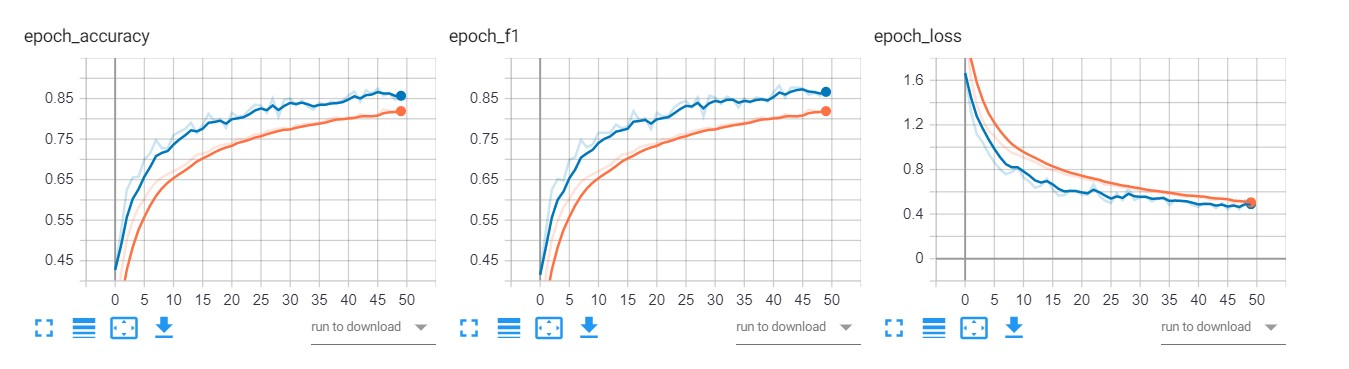

In [29]:
from IPython.display import Image
Image('Model4.jpg')

__Legend:__
>_Blue_: Validation<br>
>_Orange_: Train

# Observations:
- The model was performing very badly when the raw audio data was passed.
- However, it's performance improved much more when we trained it on the spectrograms instead.
- This might be because the spectrograms provide much more information about the audio signal such as the different frequencies and their corresponding _intensity_ or the _"loudness"_.
- This might have given the model a much more quality information about the sound signal and hence it was able to perform so well on the spectrograms.

- On the other hand, using data augmentation had it's own advantages.
- The performance of the model consideably increased on the spectrograms when trained on the augmented data compared to the original dataset.
- No improvement in performance was seen in the model that was given raw data even after augmenation.